### Problem Statement:-

Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.

### Objective:-

Our objective is to build a machine learning model to predict whether the customer will churn or not in the next six months.


### Importing required libraries

In [1]:
import numpy as np  # linear algebra

import pandas as pd  # data processing and manipulation

import matplotlib.pyplot as plt  #for visualization

import seaborn as sns   #for visualization

import warnings   #for ignoring warnings

warnings.filterwarnings('ignore')

### Importing given dataset

In [2]:
#here we are importing datasets and storing them to dataframes train and test

train = pd.read_csv('train_PDjVQMB.csv')

test = pd.read_csv('test_lTY72QC.csv')


In [3]:
# here we are using head function to show first 2 rows of the train dataset

train.head(2)


,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0


Feature description of train dataset :-

    Train dataset contains the customer demographics and past activity with the bank. And also the target label representing whether the customer will churn or not.

ID                      :     Unique Identifier of a row

Age                     :     Age of the customer

Gender                  :     Gender of the customer (Male and Female)

Income                  :     Yearly income of the customer

Balance                 :     Average quarterly balance of the customer

Vintage                 :     No. of years the customer is associated with bank

Transaction_Status      :     Whether the customer has done any transaction in the past 3 months or not

Product_Holdings        :     No. of product holdings with the bank

Credit_Card             :     Whether the customer has a credit card or not

Credit_Category         :     Category of a customer based on the credit score

Is_Churn                :     Whether the customer will churn in next 6 months or not



In [4]:
# here we are using head function to show first 2 rows of the test dataset

test.head(2)


,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average


Feature description of test dataset :-

    Test dataset contains the customer demographics and past activity with the bank. And you need to predict whether the customer will churn or not.

ID : Unique Identifier of a row

Age : Age of the customer

Gender : Gender of the customer (Male and Female)

Income : Yearly income of the customer

Balance : Average quarterly balance of the customer

Vintage : No. of years the customer is associated with bank

Transaction_Status : Whether the customer has done any transaction in the past 3 months or not

Product_Holdings : No. of product holdings with the bank

Credit_Card : Whether the customer has a credit card or not

Credit_Category : Category of a customer based on the credit score

In [5]:
# here we are defining a function data overview to get overview of data

def dataoveriew(data, message):
    
    print(f'{message}:\n')
    
    # here we are using shape function and axis 0 to get row count
    print('Number of rows: ', data.shape[0])
    
    #here we are using shape function and axis 1 to get column count
    print("\nNumber of features:", data.shape[1])
    
    print("\nData Features:")
    
    #here we are using columns function to get column list
    print(data.columns.tolist())
    
    #here we are using isnull function to get null value count
    print("\nMissing values:", data.isnull().sum().values.sum())
    
    print("\nUnique values:")
    
    #here we are using nunique function to get unique values
    print(data.nunique())
    
    #here we are using duplicated function to get duplicate rows count
    print("\nduplicate rows:", data.duplicated().value_counts())
    
dataoveriew(train, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  6650

Number of features: 11

Data Features:
['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn']

Missing values: 0

Unique values:
ID                    6650
Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

duplicate rows: False    6650
dtype: int64


From the above output we can understand that train dataset has 6650 rows and 11 columns. There are no null values present in the dataset and there are no duplicated rows.

In [6]:
#here we are using info function to check the datatypes of columns and non null value count

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


from the output we can state that there are no null values present in the dataset but the product holdings feature has to be in interger format but it is in object format we need to change that.

In [7]:
#here we are using to numeric function to change the datatype of product_holdings

#here we are using errors = coerce because there is a string i.e; 3+ present in the column 

#after using errors = coerce it will replace strings with null values

train['Product_Holdings'] = pd.to_numeric(train['Product_Holdings'], errors='coerce')

#filling null values with 3 as earlier the string is 3+

train['Product_Holdings'] = train['Product_Holdings'].fillna(3)

#converting product holdings float to int

train['Product_Holdings'] = train['Product_Holdings'].astype(np.int64)


In [8]:
#again we are changing datatype for test set as well

test['Product_Holdings'] = pd.to_numeric(test['Product_Holdings'], errors='coerce')

test['Product_Holdings'] = test['Product_Holdings'].fillna(3)

test['Product_Holdings'] = test['Product_Holdings'].astype(np.int64)

In [9]:
#again checking for datatypes

train.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings        int64
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

As we see we got the clean dataset we can go for further analysis

In [10]:
#here we are using describe function to check basic statistical values

train.describe()

,Age,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,1.559098,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.571977,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,1.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,1.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,2.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,2.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,3.000000,1.000000,1.000000


In [11]:
#here we are using value_counts to get churn counts

train.Is_Churn.value_counts()



0    5113
1    1537
Name: Is_Churn, dtype: int64

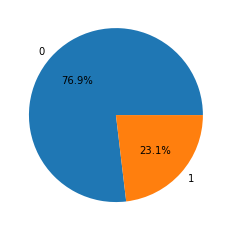

In [12]:
#here we are using plt.pie to show the percentage differences in churn count

target = train["Is_Churn"].value_counts().to_frame()
target = target.reset_index()
target = target.rename(columns={'index': 'Category'})

plt.pie(target["Is_Churn"], labels = target["Category"], autopct='%1.1f%%')

plt.show()

As we can see from the outputs our target variable churn has imbalanced class distribution. It effects the performance of model negatively. We can overcome the issue by using upsampling and downsampling methods.

It's important to discover the features before go for model building

In [13]:
#here we are using for loop to extract binary coumns

columns = train.columns

binary_cols = []

for col in columns:
    
    if train[col].value_counts().shape[0] == 2:
        
        binary_cols.append(col)
        
#categorical features with two classes
        
binary_cols

['Gender', 'Transaction_Status', 'Credit_Card', 'Is_Churn']

In [14]:
#Categorical features with multiple classes

multiple_catcol = ['Income','Product_Holdings','Credit_Category','Vintage']

multiple_catcol

['Income', 'Product_Holdings', 'Credit_Category', 'Vintage']

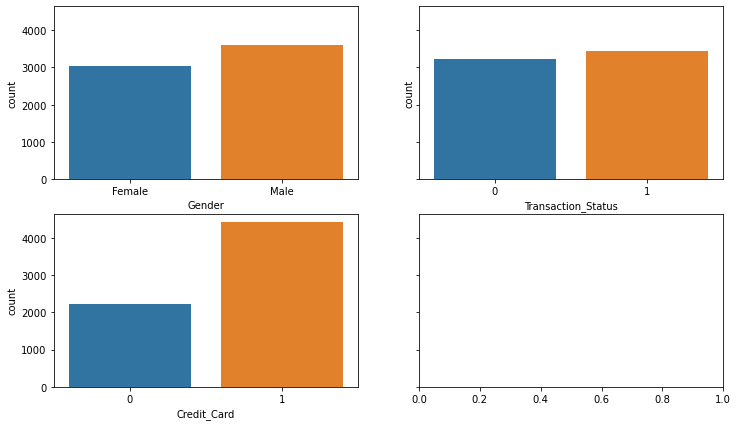

In [15]:
#here we are using countplot to check the class distribution of the binary columns

fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)

sns.countplot("Gender", data=train, ax=axes[0,0])

sns.countplot("Transaction_Status", data=train, ax=axes[0,1])

sns.countplot("Credit_Card", data=train, ax=axes[1,0])

plt.show()

There is high imbalance in credit card variable. most of the people have credit cards. Let's check the target variable changes according to binary features.

In [16]:
#here we are using groupby function to check variation of churn rate in gender

train[['Gender','Is_Churn']].groupby(['Gender']).mean()

,Is_Churn
Gender,
Female,0.25576
Male,0.21041


Average churn rate is approximately same for male and female so variable gender won't give us valuable prediction to model so I'm not going to use this variable in model.

In [17]:
train[['Transaction_Status','Is_Churn']].groupby(['Transaction_Status']).mean()

,Is_Churn
Transaction_Status,
0,0.268944
1,0.195627


In [18]:
train[['Credit_Card','Is_Churn']].groupby(['Credit_Card']).mean()

,Is_Churn
Credit_Card,
0,0.231631
1,0.230874


Transaction status has an effect on target variable and credit card won't effecting it. So I'm using Transaction status in my model.

<AxesSubplot:xlabel='Income', ylabel='count'>

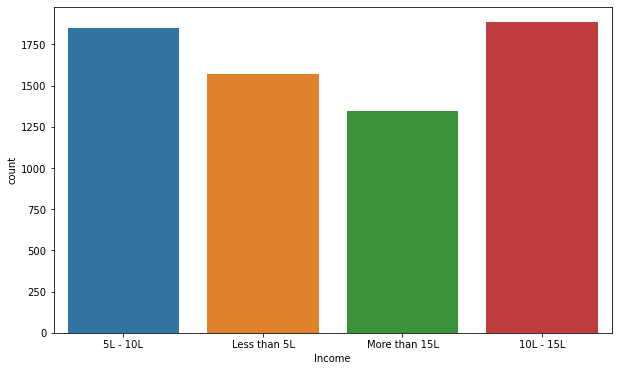

In [19]:
#here we are using countplot to check the distribution of income

plt.figure(figsize=(10,6))

sns.countplot("Income", data=train)

In [20]:
# here again we are using groupby function to check the variation of churn rate in other categorical variables

train[['Income','Is_Churn']].groupby(['Income']).mean()

,Is_Churn
Income,
10L - 15L,0.235544
5L - 10L,0.223064
Less than 5L,0.225048
More than 15L,0.243123


<AxesSubplot:xlabel='Product_Holdings', ylabel='count'>

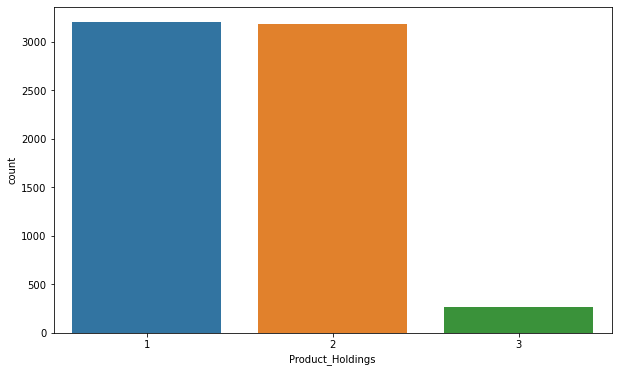

In [21]:
#here we are using countplot to check the distribution of product_holdings

plt.figure(figsize=(10,6))

sns.countplot("Product_Holdings", data=train)

In [22]:
train[['Product_Holdings','Is_Churn']].groupby(['Product_Holdings']).mean()

,Is_Churn
Product_Holdings,
1,0.245625
2,0.217473
3,0.220149


Customers whose product holdings are only 1 are more likely to churn and these are equally higher than 2 product holdings.

<AxesSubplot:xlabel='Credit_Category', ylabel='count'>

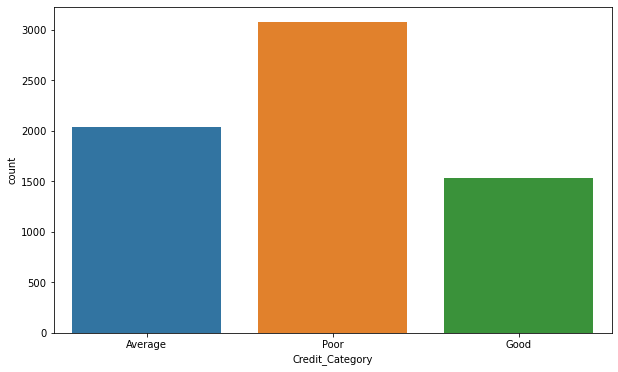

In [23]:
#here we are using countplot to check the distribution of Credit_Category

plt.figure(figsize=(10,6))

sns.countplot("Credit_Category", data=train)

In [24]:
train[['Credit_Category','Is_Churn']].groupby(['Credit_Category']).mean()

,Is_Churn
Credit_Category,
Average,0.230543
Good,0.203135
Poor,0.245449


poor credit category customers are more likely to churn and these customers are higher amongst others.

<AxesSubplot:xlabel='Vintage', ylabel='count'>

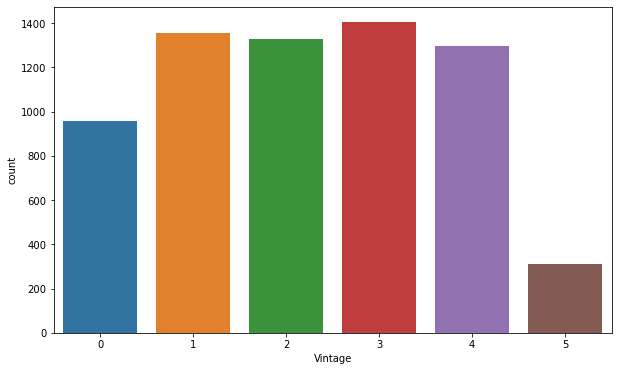

In [25]:
#here we are using countplot to check the distribution of Vintage

plt.figure(figsize=(10,6))

sns.countplot("Vintage", data=train)

In [26]:
train[['Vintage','Is_Churn']].groupby(['Vintage']).mean()

,Is_Churn
Vintage,
0,0.210251
1,0.242245
2,0.207831
3,0.241281
4,0.247685
5,0.231511


as we see the above outputs income not effecting the target variable so I'm not taking it to model building. Remaining columns are more or less effecting the target variable.

<AxesSubplot:xlabel='Balance', ylabel='Density'>

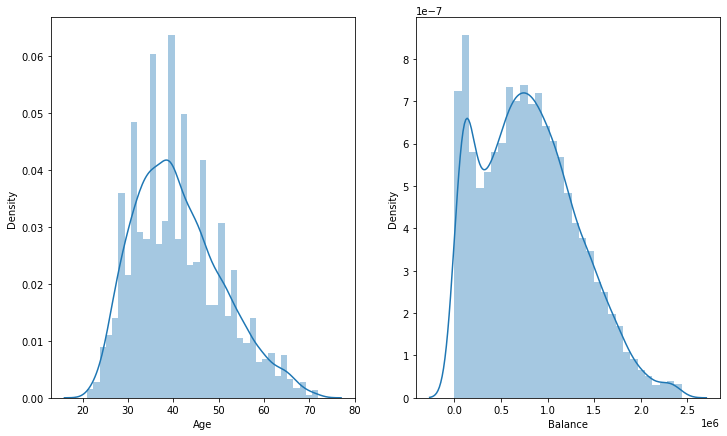

In [27]:
#we are using distplot to check the distribution of numericl variables

fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.distplot(train["Age"], ax=axes[0])

sns.distplot(train["Balance"], ax=axes[1])


age is normally distributed and balance is not normally distributed. Most of the customers are between 30 to 50 age group. 

In [28]:
#here we are checking for churn rate variation according to age and balance

train[['Age','Balance','Is_Churn']].groupby(['Is_Churn']).mean()



,Age,Balance
Is_Churn,,
0,40.045375,788653.739642
1,44.739102,857626.896461


customers having age around 45 and balance around 0.85L have more churn rate.

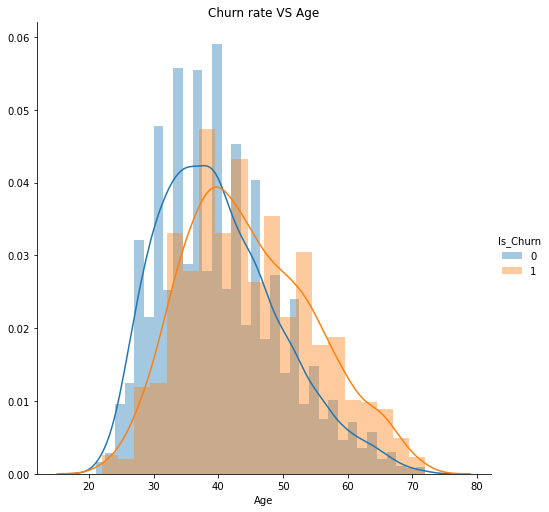

In [29]:
#plotting distplot to check the distribution of age among churn rate

sns.FacetGrid(train, hue='Is_Churn',size=7).map(sns.distplot, 'Age').add_legend()

plt.title('Churn rate VS Age')

plt.show()


Customers having age group 40 to 50 has more churn rate.

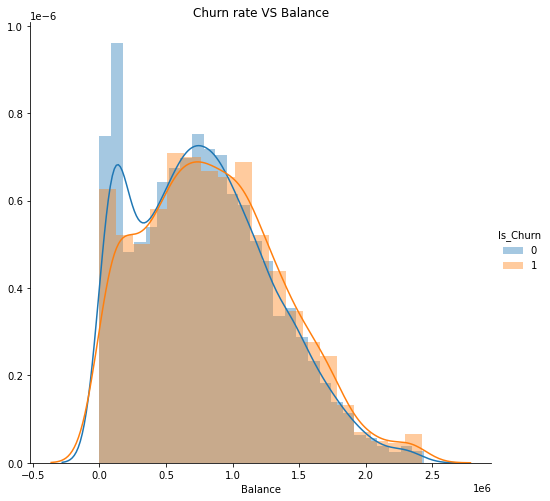

In [30]:
#plotting distplot to check the distribution of balance among churn rate

sns.FacetGrid(train, hue='Is_Churn',size=7).map(sns.distplot, 'Balance').add_legend()

plt.title('Churn rate VS Balance')

plt.show()

customers who are having 0.5 to 1.0 lakh balance has more churn rate.

After exploring the variables I've decided not to use the following vaariables as they won't have much predictive power to model.

ID, Gender, Credit_Card, Income


In [31]:
#here we are using drop function to drop unnecessary columns

train.drop(['ID','Gender','Income','Credit_Card'], axis=1, inplace=True)

### Data preprocessing

In [32]:
# converting categorical features to numerical features by label encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#train dataset
train["Credit_Category"]=le.fit_transform(train["Credit_Category"])

#test Dataset
test["Credit_Category"]=le.fit_transform(test["Credit_Category"])

#dropping unnecessary features from test dataset
test.drop(['Gender','Income','Credit_Card'],axis=1, inplace=True)


In [33]:
train.head(2)

,Age,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Category,Is_Churn
0,36,563266.44,4,0,1,0,1
1,53,875572.11,2,1,1,2,0


In [34]:
test.head(2)

,ID,Age,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Category
0,55480787,50,1008636.39,2,1,2,0
1,9aededf2,36,341460.72,2,0,2,0


### Resampling 

As we earlier see target variable has imbalanced class distribution so it is not suitable for machine learning models. I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

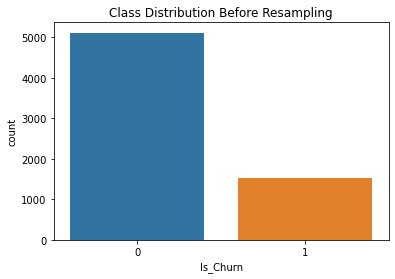

In [35]:
#plotting countplot before upsampling

sns.countplot('Is_Churn', data=train).set_title('Class Distribution Before Resampling')

plt.show()

5113


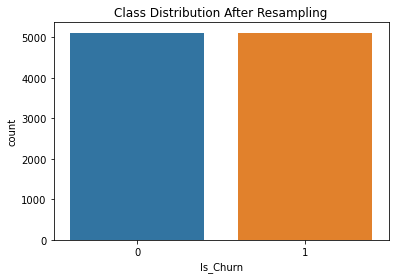

In [36]:
#separating positive and negative classes

train_no = train[train.Is_Churn == 0]
train_yes = train[train.Is_Churn == 1]

#upsampling the positive class

train_yes_upsampled = train_yes.sample(n=len(train_no), replace=True, random_state=42)

print(len(train_yes_upsampled))

#combining positive and negative class and checking the class distribution

train_upsampled = train_no.append(train_yes_upsampled).reset_index(drop=True)

#plotting countplot after upsampling
sns.countplot('Is_Churn', data=train_upsampled).set_title('Class Distribution After Resampling')

plt.show()

### model creation and evaluation 

In [37]:
#importing test train split

from sklearn.model_selection import train_test_split

#assigning independent variables to x
x = train_upsampled.drop('Is_Churn',axis=1).values

#assigning dependent variable to y
y = train_upsampled.Is_Churn.values

#extracting final submission id
submission_id = test.ID

#dropping ID column from test set
test = test.drop('ID', axis=1)

# spliting the data into test and train giving test size as 0.3
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

### Feature Scaling

In [38]:
# creating the object of minmax scaler

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

#scaling x train
x_train = sc.fit_transform(x_train)

#scaling x test
x_test = sc.transform(x_test)

#scaling test dataset
test = sc.transform(test)

In [39]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)
        con_matrix = confusion_matrix(y_true, y_pred)
        print("confusion matrix: " , con_matrix)

    print_scores(alg, y_test, y_pred)
    return model

In [40]:
# Running logistic regression model

log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.6082138200782269
precision:  0.6136986301369863
recall:  0.5840938722294654
f1_score:  0.6079857572135571
confusion matrix:  [[970 564]
 [638 896]]


In [41]:
#running support vector machine model
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.614406779661017
precision:  0.6158415841584158
recall:  0.6082138200782269
f1_score:  0.6143919905340511
confusion matrix:  [[952 582]
 [601 933]]


In [59]:
# running Random forest model
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

y_pred1_rf = rf_model.predict(x_test)

Random Forest Classification
accuracy:  0.8604954367666232
precision:  0.822637106184364
recall:  0.9191655801825294
f1_score:  0.8600135775009211
confusion matrix:  [[1230  304]
 [ 124 1410]]


In [43]:
# running Decision tree model
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.8282268578878749
precision:  0.7755883962780514
recall:  0.923728813559322
f1_score:  0.8266457591182373
confusion matrix:  [[1124  410]
 [ 117 1417]]


In [44]:
#as we can see the above results in randomforest model we got high accuracy values so I'm taking this to predict test dataset
Is_Churn_submission = rf_model.predict(test)

In [45]:
Is_Churn_submission

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [46]:
#storing id and test predictions to dataframe submission 

submission = pd.DataFrame({'ID':submission_id, 'Is_Churn':Is_Churn_submission})
submission.head()

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
